Structured data -> ML (Gemini)

Image-> Computer vision/ ANN (Fashion mnist/MNIST)

Cifar10 -> LLM(Image classification/VQA/Image to text)

Text -> NLP

NLP -> Dealing with Text

In [ ]:
### Import the packages->numpy,pandas,matplotlib,seaborn
### Load the excel file
### Display random 10 records
### Missing Values?
### Except Reviews and Stars remaining can be dropped
### create a new column Reviews_clean and convert the Reviews to lowercase
### Remove Punctuation marks from Reviews_clean
### Remove extra whitespaces from Reviews_clean
### Tokenization in Reviews_clean
### Remove Stop words from Reviews_clean
### Count of most Frequent words
### Word cloud
### Vectorizer
### ML models(any 3)
### Deploy with gradio


In [ ]:
df["Stars"].value_counts()

In [ ]:
# prompt: Import the packages->numpy,pandas,matplotlib,seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("/content/BankReviews.xlsx")

In [ ]:
df.sample(10)

,Date,Stars,Reviews,BankName
270,2017-03-04,5,_x000D_\nStephanie and her team were fantastic...,Triumph Lending
230,2016-09-30,1,_x000D_\nWhat a horrible experience. We have e...,North American Savings Bank
436,2017-05-24,5,_x000D_\nRob was very helpful in getting this ...,North American Savings Bank
312,2017-01-26,5,_x000D_\nAdan Munoz apparently does not sleep ...,LoanSnap
72,2016-04-13,5,_x000D_\nIt was fast easy and did not have to ...,Reliance First Capital
315,2016-01-30,5,_x000D_\n I had the pleasure of working with A...,LoanSnap
25,2016-01-08,5,The NASB team went above and beyond for me and...,North American Savings Bank
430,2017-10-26,5,_x000D_\nJon Barrett was a great asset to my h...,North American Savings Bank
224,2016-06-26,1,_x000D_\ncan someone explain why the APR is mo...,North American Savings Bank
366,2016-02-14,5,_x000D_\nRick and his team with Guaranteed Rat...,Guarenteed Rate Inc


In [ ]:
df["Stars"].value_counts()

,count
Stars,
5,410
1,95


In [ ]:
df.isnull().sum()

,0
Date,0
Stars,0
Reviews,0
BankName,0


In [ ]:
df=df.drop(["Date","BankName"],axis=1)

In [ ]:
df.sample(5)

,Stars,Reviews,Reviews_clean
17,1,This was the worst experience ever. It was lik...,this was the worst experience ever. it was lik...
146,5,_x000D_\nIt was a pleasure to work with Pacifi...,_x000d_\nit was a pleasure to work with pacifi...
113,5,"_x000D_\nShawn is organized, quick to respond,...","_x000d_\nshawn is organized, quick to respond,..."
465,5,_x000D_\nTheir loan officer and his team were ...,_x000d_\ntheir loan officer and his team were ...
480,5,_x000D_\nSteve was very responsive and patient...,_x000d_\nsteve was very responsive and patient...


In [ ]:
# prompt: create a new column Reviews_clean and convert the Reviews to lowercase

df["Reviews_clean"] = df["Reviews"].str.lower()
df.head(5)

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","great job, wyndham capital! each person was pr..."
1,5,Matthew Richardson is professional and helpful...,matthew richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...,we had a past experience with wyndham mortgage...
3,5,We have been dealing with Brad Thomka from the...,we have been dealing with brad thomka from the...
4,5,I can't express how grateful I am for the supp...,i can't express how grateful i am for the supp...


In [ ]:
# prompt: Remove Punctuation marks from Reviews_clean

import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['Reviews_clean'] = df['Reviews_clean'].apply(remove_punctuation)
df.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital each person was prof...
1,5,Matthew Richardson is professional and helpful...,matthew richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...,we had a past experience with wyndham mortgage...
3,5,We have been dealing with Brad Thomka from the...,we have been dealing with brad thomka from the...
4,5,I can't express how grateful I am for the supp...,i cant express how grateful i am for the suppo...


In [ ]:
# prompt: Remove whitespaces from Reviews_clean
import nltk
nltk.download('punkt_tab')
df['Reviews_clean'] = df['Reviews_clean'].str.strip()
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital each person was prof...
1,5,Matthew Richardson is professional and helpful...,matthew richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...,we had a past experience with wyndham mortgage...
3,5,We have been dealing with Brad Thomka from the...,we have been dealing with brad thomka from the...
4,5,I can't express how grateful I am for the supp...,i cant express how grateful i am for the suppo...


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# prompt: Tokenization in Reviews_clean

df['Reviews_clean'] = df['Reviews_clean'].apply(nltk.word_tokenize)
df.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, each, person, w..."
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, is, professional, and, h..."
2,5,We had a past experience with Wyndham Mortgage...,"[we, had, a, past, experience, with, wyndham, ..."
3,5,We have been dealing with Brad Thomka from the...,"[we, have, been, dealing, with, brad, thomka, ..."
4,5,I can't express how grateful I am for the supp...,"[i, cant, express, how, grateful, i, am, for, ..."


In [ ]:
# prompt: Remove Stop words from Reviews_clean

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]

df['Reviews_clean'] = df['Reviews_clean'].apply(remove_stopwords)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess..."
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h..."
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w..."
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st..."
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi..."


In [ ]:
# prompt: Lemmatization in Reviews_clean

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  return [lemmatizer.lemmatize(word) for word in tokens]

df['Reviews_clean'] = df['Reviews_clean'].apply(lemmatize_tokens)
df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess..."
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h..."
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w..."
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st..."
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi..."


In [ ]:
# prompt: Count of most Frequent words

all_words = [word for tokens in df['Reviews_clean'] for word in tokens]
freq_dist = nltk.FreqDist(all_words)
print("Most frequent words:")
print(freq_dist.most_common(20)) # Display the top 20 frequent words

Most frequent words:
[('x000d', 713), ('loan', 326), ('process', 248), ('would', 246), ('time', 217), ('u', 207), ('home', 194), ('read', 190), ('morex000d', 187), ('mortgage', 151), ('recommend', 150), ('rate', 140), ('great', 139), ('work', 137), ('closing', 136), ('made', 117), ('team', 112), ('experience', 110), ('question', 106), ('service', 103)]


In [ ]:
# prompt: Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

# Convert lists of tokens back to strings for CountVectorizer
df['Reviews_clean_str'] = df['Reviews_clean'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text
X = vectorizer.fit_transform(df['Reviews_clean_str'])

# You can view the shape of the vectorized data (number of samples, number of unique words)
print("Shape of the vectorized data:", X.shape)

# You can also get the feature names (the words in the vocabulary)
# print("Feature names (vocabulary):", vectorizer.get_feature_names_out())

Shape of the vectorized data: (505, 2596)


In [ ]:
# prompt: ML models(any 3)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'Stars' is your target variable
y = df['Stars']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("-" * 50)

# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000) # Increase max_iter for convergence
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("-" * 50)

# Model 3: Support Vector Machine (Linear Kernel)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine (Linear Kernel):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("-" * 50)

Multinomial Naive Bayes:
Accuracy: 0.9603960396039604
Classification Report:
               precision    recall  f1-score   support

           1       0.84      1.00      0.91        21
           5       1.00      0.95      0.97        80

    accuracy                           0.96       101
   macro avg       0.92      0.97      0.94       101
weighted avg       0.97      0.96      0.96       101

Confusion Matrix:
 [[21  0]
 [ 4 76]]
--------------------------------------------------
Logistic Regression:
Accuracy: 0.9603960396039604
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.81      0.89        21
           5       0.95      1.00      0.98        80

    accuracy                           0.96       101
   macro avg       0.98      0.90      0.94       101
weighted avg       0.96      0.96      0.96       101

Confusion Matrix:
 [[17  4]
 [ 0 80]]
--------------------------------------------------
Support Vector M

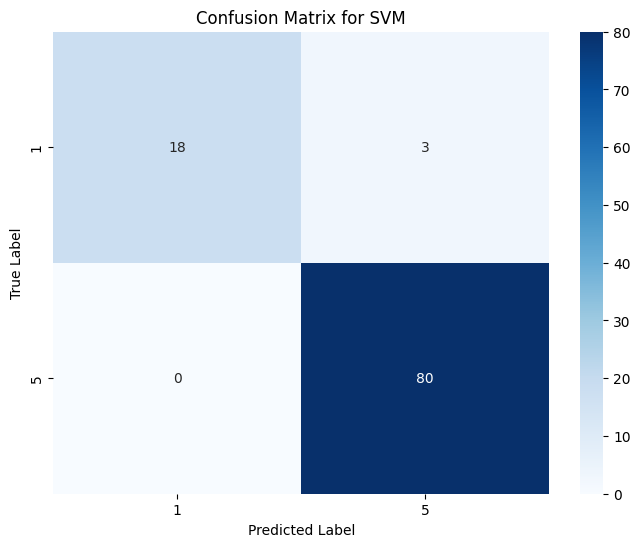

In [ ]:
# prompt: confusion matrix for svm

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# prompt: deploy with gradio

!pip install -q gradio

import gradio as gr

def clean_and_vectorize_text(text, vectorizer, stop_words, lemmatizer):
    """Cleans and vectorizes a single piece of text."""
    text = text.lower()
    text = remove_punctuation(text)
    text = text.strip()
    tokens = nltk.word_tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_tokens(tokens)
    cleaned_text = ' '.join(tokens)
    vectorized_text = vectorizer.transform([cleaned_text])
    return vectorized_text

def predict_sentiment(review):
    """Predicts the sentiment (star rating) of a review."""
    cleaned_vectorized_review = clean_and_vectorize_text(review, vectorizer, stop_words, lemmatizer)
    # Using the best performing model, which appears to be SVM based on the previous output
    prediction = svm_model.predict(cleaned_vectorized_review)
    return f"Predicted Star Rating: {prediction[0]}"

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter bank review here..."),
    outputs="text",
    title="Bank Review Sentiment Predictor",
    description="Enter a bank review and get a predicted star rating."
)

# Launch the interface
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://da5b20c0dd236952af.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
pip install transformers

In [ ]:
### llm (genai)

from transformers import pipeline

In [ ]:
sentiment_analyzer=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
sentiment_analyzer("The movie is boring and lengthy")

[{'label': 'NEGATIVE', 'score': 0.9997726082801819}]

In [ ]:
sentiment_analyzer("The product is costly but good")

[{'label': 'POSITIVE', 'score': 0.9996551275253296}]

In [ ]:
sentiment_analyzer("The product is good but costly")

[{'label': 'POSITIVE', 'score': 0.5574369430541992}]

In [ ]:
### positive
### negative
### not good with mixed(The Phone display is good but costly)
### (The phone is costly but the display is good)
### neutral -> The service is average/ She went to the library

In [ ]:
### nlp -> failed with new text
### llm-> positive or negative
### Bank reviews->(llm)-> bert uncased


### open new notebook-> uplod this excel -> using the llm predict the sentiment(positive,negative)

### pred_sentiment into the excel sheet(download)

### compare actual(1,5) against predicted

In [ ]:
from transformers import pipeline

In [ ]:
### Named Entity Recognition
ner_1=pipeline(task="ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
ner_1("I am working at Amazon")

[{'entity': 'I-ORG',
  'score': np.float32(0.995411),
  'index': 5,
  'word': 'Amazon',
  'start': 16,
  'end': 22}]

In [ ]:
ner_1("I am working at amazon")

[{'entity': 'I-ORG',
  'score': np.float32(0.66014427),
  'index': 5,
  'word': 'am',
  'start': 16,
  'end': 18},
 {'entity': 'I-ORG',
  'score': np.float32(0.87686133),
  'index': 6,
  'word': '##az',
  'start': 18,
  'end': 20},
 {'entity': 'I-ORG',
  'score': np.float32(0.7825637),
  'index': 7,
  'word': '##on',
  'start': 20,
  'end': 22}]

In [ ]:
ner_1("Gandhi is the father of India")

[{'entity': 'I-PER',
  'score': np.float32(0.99579775),
  'index': 1,
  'word': 'Gandhi',
  'start': 0,
  'end': 6},
 {'entity': 'I-LOC',
  'score': np.float32(0.99837816),
  'index': 6,
  'word': 'India',
  'start': 24,
  'end': 29}]

In [ ]:
ner_1("Nehru was the Prime Minister of India")

[{'entity': 'I-PER',
  'score': np.float32(0.9994253),
  'index': 1,
  'word': 'Nehru',
  'start': 0,
  'end': 5},
 {'entity': 'I-LOC',
  'score': np.float32(0.994697),
  'index': 7,
  'word': 'India',
  'start': 32,
  'end': 37}]

In [ ]:
## Test with 5 sentences

In [ ]:
ner_1("I love Apple")

[{'entity': 'I-ORG',
  'score': np.float32(0.8248456),
  'index': 3,
  'word': 'Apple',
  'start': 7,
  'end': 12}]

In [ ]:
ner_1("Gandhi started Quit India Movement")

In [ ]:
summarizer=pipeline(task="summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
text="The sun rose quietly. Birds started singing. The air felt fresh. Flowers opened slowly. Dew sparkled on leaves. Children walked to school. Roads began to fill. Cars moved fast. Shops lifted their shutters. Vendors arranged fruits. People hurried for work. Coffee smelled strong. Newspapers arrived early. Dogs barked happily. The city woke up. Bells rang from a temple. Someone watered plants. Someone else swept the yard. The morning felt calm. Clouds drifted gently. A bus stopped nearby. Passengers stepped in. A man checked his watch. A woman read a book. The driver honked once. The bus rolled ahead. Students chatted softly. The breeze touched faces. Trees waved lightly. The sky turned bright. The day had begun. Offices opened their doors. Computers came alive. Mails started flowing. Phones began ringing. Meetings filled the day. Tea breaks brought laughter. Lunch smelled delicious. Friends shared stories. Time moved quickly. The sun climbed high. Shadows grew shorter. Work piled up again. Typing sounds continued. Ideas were discussed. Decisions were made. Some felt tired. Some felt inspired. The clock struck three. Rain clouds appeared. Wind became cool. Curtains fluttered gently. Rain began to fall. Streets turned shiny. People ran for cover. Umbrellas opened wide. Children jumped in puddles. Thunder rolled once. Rain softened again. The air smelled clean. Trees looked greener. Birds hid in branches. Cars splashed water. People smiled unknowingly. Evening lights flickered. Roads glowed wet. Crowds thinned slowly. The rain stopped. The sun peeked again. A rainbow appeared faintly. Cameras came out. Laughter returned. The city felt peaceful. Shops closed gradually. Streetlights turned on. Buses grew empty. Silence grew stronger. Houses lit up. Dinner was served. Families gathered. Stories were told. Children laughed again. Television played softly. Clocks ticked gently. Stars shone bright. The moon climbed high. Crickets began chirping. The wind cooled down. Someone wrote a diary. Someone read a novel. Yawns filled rooms. Curtains were drawn. Lights went off. Streets fell quiet. Dreams began to form. The night deepened. Peace surrounded everything. Another day had ended."

In [ ]:
summarizer(text,max_length=60)

[{'summary_text': ' The city woke up quietly. Birds started singing. The air felt fresh. Flowers opened slowly. People hurried for work . The sun climbed high. The moon climbed high . The clock struck three. Rain clouds appeared. Rain began to fall. People ran for cover. Umbrellas opened'}]

In [ ]:
## Question-answering(Chatbot)
qa=pipeline(task="question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
text="Albert Einstein was a theoretical physicist known for the theory of relativity."

In [ ]:
question="What is ml?"

In [ ]:
qa(question=question,context=text)

{'score': 0.23949681222438812,
 'start': 22,
 'end': 78,
 'answer': 'theoretical physicist known for the theory of relativity'}

In [ ]:
### Find a different model that performs better than the default model
### deepset/roberta-base-squad2

In [ ]:
### Text generation
generator=pipeline(task="text-generation",model="EleutherAI/gpt-neo-1.3B")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
prompt="Write a short message for junior Data Scientists."
generator(prompt,max_new_tokens=100)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Write a short message for junior Data Scientists. In the first part of the message, you ask the student to write in the subject line "I just wanted to know if you can read this." The student will then use the information provided to help the student to understand the subject line.\n\nIn the second part of the message, the student will write a short message for junior Data Scientists. In the first part of the message, you ask the student to write in the subject line "I just wanted to know if you can read this."'}]

In [ ]:
### Better model for text generation

In [ ]:
### hugging face-> image classifn,vqa,image captioning -> Deployed
### Text summariztion,classification,NER,generation ,question answering

In [ ]:
#### Try with all the tasks post session

In [ ]:
### Asssessment-3: Pdf -> Summarize